<a href="https://colab.research.google.com/github/Joelss23/Proyectos-y-Actividades/blob/main/Proyecto_Teoria_de_Juegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final Teoria de Juegos Grupo #3


##Importando Librerias

In [ ]:
#Librerias de analisis de datos
import pandas as pd
import numpy as np
import random as rnd

#librerias de visualizacion
import seaborn as sns
import matplotlib.pyplot as plt

#Librerias para aplicar algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

##Lectura del Dataset

In [ ]:
df = pd.read_csv("players_22.csv",low_memory=False)
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


##Limpieza de datos

In [ ]:
#Se eliminan todas aquellas columnas que contenga "url"
df = df[df.columns.drop(list(df.filter(regex='url')))]

df

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Crecimiento
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,...,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,0
1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,0
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,...,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,0
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,...,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,0
4,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,...,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,...,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2,5
19235,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,...,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2,12
19236,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,...,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2,8
19237,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,...,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2,13


In [ ]:
#Se muestra la estructura de las columnas
df.dtypes

sofifa_id            int64
short_name          object
long_name           object
player_positions    object
overall              int64
                     ...  
lcb                 object
cb                  object
rcb                 object
rb                  object
gk                  object
Length: 104, dtype: object

In [ ]:
#Hay algunas columnas donde mas del 50% de los datos son nulos o blancos, por lo se muestran la que tienen menores datos
cols_to_drop = []
for i in df.columns:
    missing = np.abs((df[i].count() - df[i].shape[0])/df[i].shape[0] * 100)
    if missing > 50:
        print('{} - {}%'.format(i, round(missing)))
        cols_to_drop.append(i)

club_loaned_from - 94%
nation_team_id - 96%
nation_position - 96%
nation_jersey_number - 96%
player_tags - 93%
player_traits - 51%
goalkeeping_speed - 89%


In [ ]:
#Se eliminan las anteriores ya que no son relevantes para el estudio
df.drop(columns=cols_to_drop,inplace=True)
print(df.shape)


(19239, 97)


<ipython-input-61-9b26ef4c0dc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cols_to_drop,inplace=True)


In [ ]:
#Se cambia el nombre de las columnas
df.rename(columns={'skill_moves':'skills'},inplace=True)

#Se imprime como queda el dataset
df.head

<ipython-input-62-fa058a5ecfb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'skill_moves':'skills'},inplace=True)


<bound method NDFrame.head of        sofifa_id          short_name                            long_name  \
0         158023            L. Messi       Lionel Andrés Messi Cuccittini   
1         188545      R. Lewandowski                   Robert Lewandowski   
2          20801   Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3         190871           Neymar Jr        Neymar da Silva Santos Júnior   
4         192985        K. De Bruyne                      Kevin De Bruyne   
...          ...                 ...                                  ...   
19234     261962           Song Defu                                  宋德福   
19235     262040           C. Porter                      Caoimhin Porter   
19236     262760            N. Logue              Nathan Logue-Cunningham   
19237     262820           L. Rudden                          Luke Rudden   
19238     264540  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential   

In [ ]:
#Para el estudio se van a utilizar las principales estadisticas de habilidades
#Ritmo, defensa, porteria, ataque, fuerza y mentalidad, por lo que se filtra
#por estas variables
filter = ['sofifa_id','skill_','movement_','defending_','goalkeeping_','attacking_','power_','mentality_']

for i in filter:
    df = df[df.columns.drop(list(df.filter(regex=i)))]

df.shape

(19239, 63)

In [ ]:
#Adicionalmente crear un dataset con las columnas a utilizar

df1 = df[['short_name','age','height_cm','weight_kg','nationality_name','club_name','overall','potential','league_name','league_level',
          'value_eur','wage_eur','player_positions','preferred_foot','international_reputation',
          'skills', 'work_rate', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

In [ ]:
#Se muestra la estructura de los datos
df1.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   short_name                19239 non-null  object 
 1   age                       19239 non-null  int64  
 2   height_cm                 19239 non-null  int64  
 3   weight_kg                 19239 non-null  int64  
 4   nationality_name          19239 non-null  object 
 5   club_name                 19178 non-null  object 
 6   overall                   19239 non-null  int64  
 7   potential                 19239 non-null  int64  
 8   league_name               19178 non-null  object 
 9   league_level              19178 non-null  float64
 10  value_eur                 19165 non-null  float64
 11  wage_eur                  19178 non-null  float64
 12  player_positions          19239 non-null  object 
 13  preferred_foot            19239 non-null  object 
 14  intern

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,...,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
19235,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,...,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
19236,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,...,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2
19237,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,...,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2


##Analisis Exploratorio

In [ ]:
#Se explora primeramente cuales son las posiciones mas comunes de los jugadores
player_positions = df1['player_positions'].value_counts().head(20)
player_positions

CB         2423
GK         2132
ST         1770
CDM, CM     953
CM          726
CM, CDM     687
LB          616
RB          576
CB, RB      295
CDM         294
CAM, CM     249
CB, LB      232
CAM         219
LB, LM      206
LM          206
CM, CAM     203
CB, CDM     202
RM, LM      196
RM          196
LM, RM      168
Name: player_positions, dtype: int64

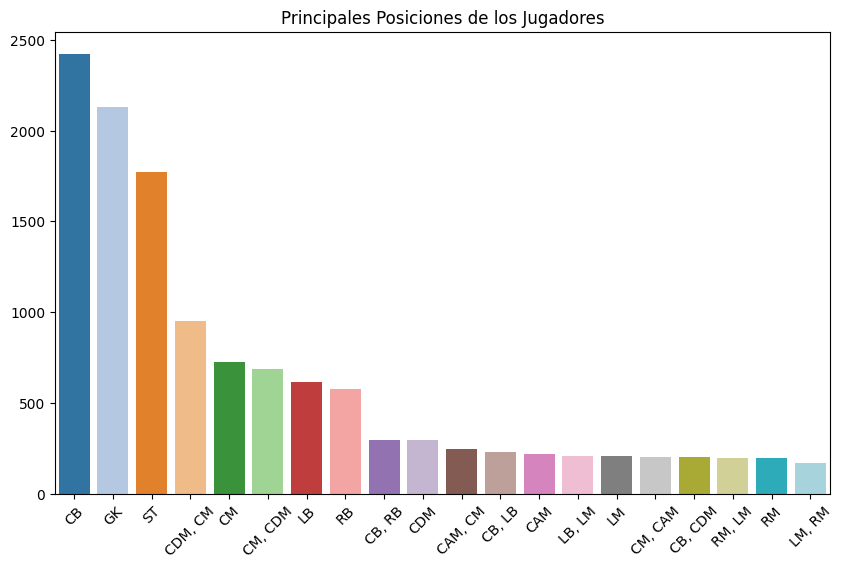

In [ ]:
#Se muestra de forma visual las principales posiciones
plt.figure(figsize=(10, 6))
sns.barplot(x=player_positions.index, y=player_positions.values,palette="tab20",capsize=.2)

plt.title('Principales Posiciones de los Jugadores')
plt.xticks(rotation=45)
plt.show()

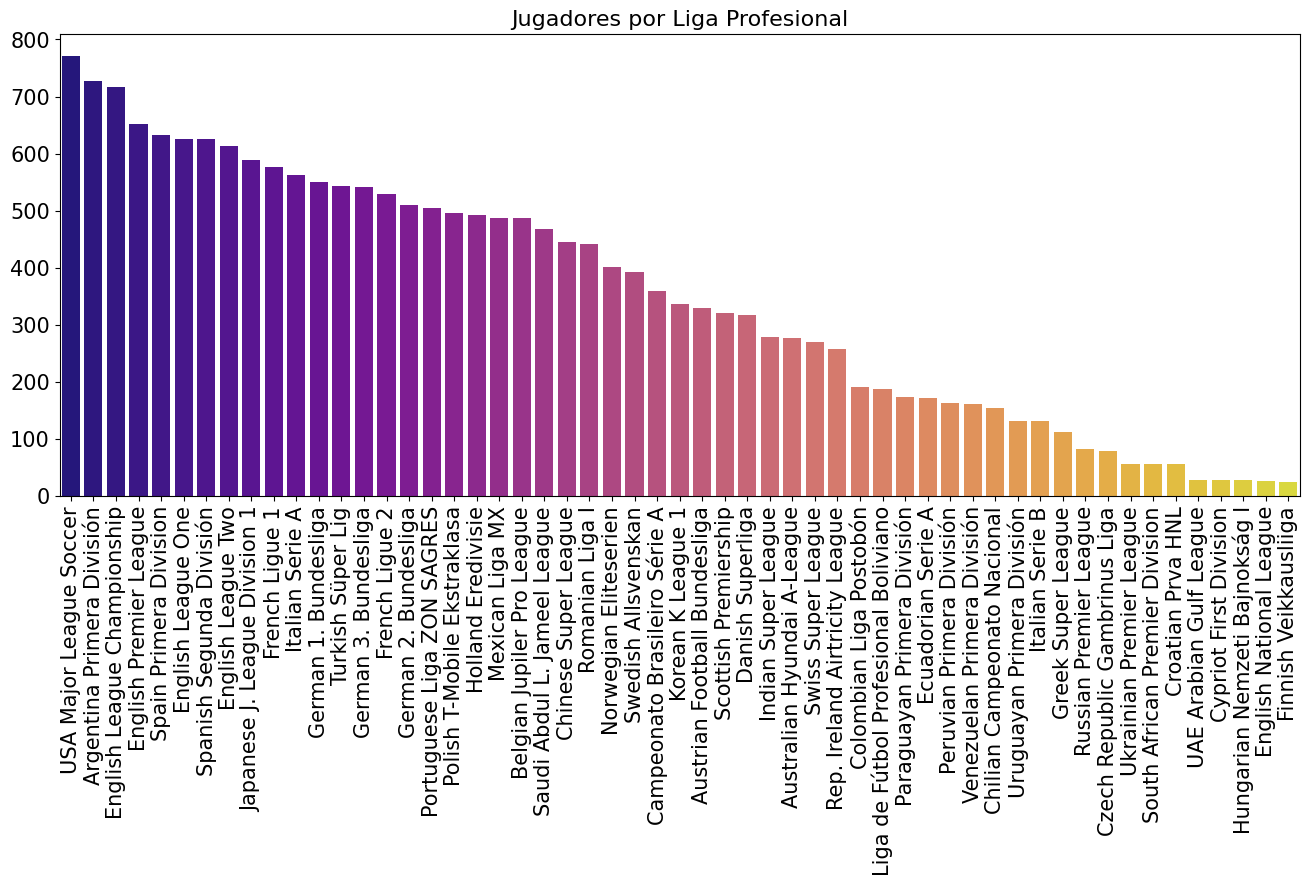

In [ ]:
#Distribucion de jugadores por liga profesional
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.league_name.value_counts().index, y=df1.league_name.value_counts().values,palette="plasma",capsize=.2)

plt.title("Jugadores por Liga Profesional", fontsize=16)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
#Jugadores con mayor representacion por pais

country_players = df1['nationality_name'].value_counts().head(10)
country_players

England          1719
Germany          1214
Spain            1086
France            980
Argentina         960
Brazil            897
Japan             546
Netherlands       439
United States     413
Poland            403
Name: nationality_name, dtype: int64

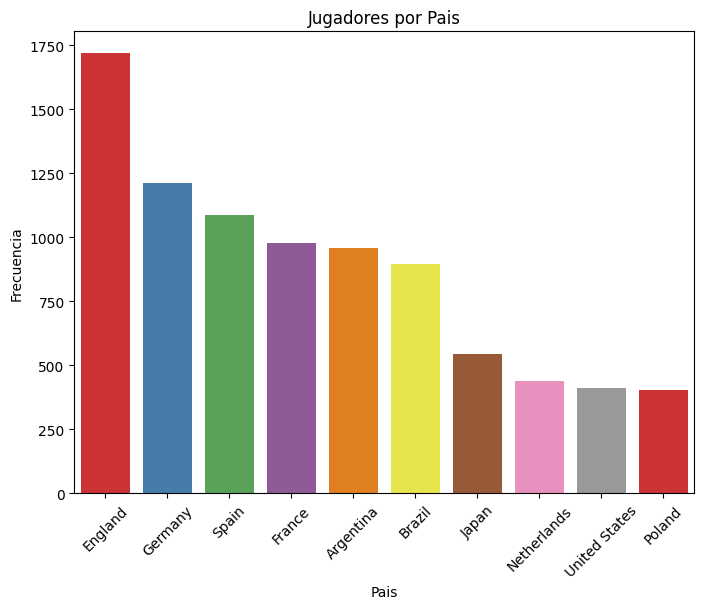

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=country_players.index, y=country_players.values,palette="Set1",capsize=.2)

plt.xlabel('Pais')
plt.ylabel('Frecuencia')
plt.title('Jugadores por Pais')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Principales jugadores con habilidades representados por pais
hg_skills = df1[df1.skills == 5]
hg_skills['nationality_name'].value_counts()

Brazil                 12
Portugal                6
France                  6
Argentina               6
England                 2
Morocco                 2
Colombia                2
Congo DR                2
Ukraine                 1
Republic of Ireland     1
Thailand                1
Gambia                  1
Romania                 1
Germany                 1
Switzerland             1
Mexico                  1
Norway                  1
Côte d'Ivoire           1
Slovenia                1
Sweden                  1
Netherlands             1
Algeria                 1
Spain                   1
Scotland                1
Name: nationality_name, dtype: int64

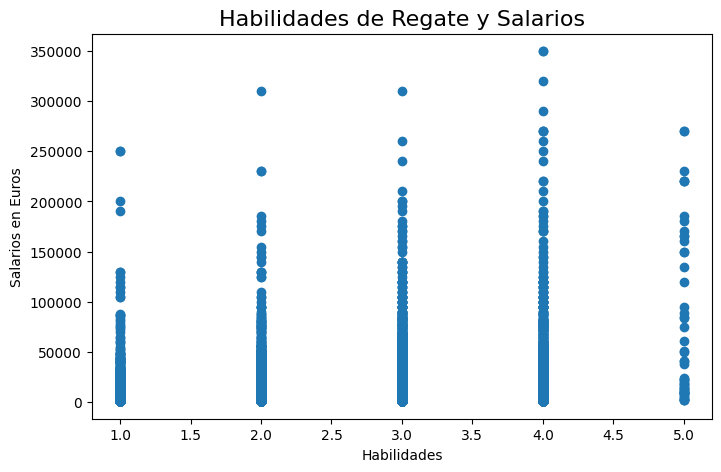

In [ ]:
#Relacion entre Habilidades y Salarios
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df1, x= 'skills', y='wage_eur')
plt.xlabel("Habilidades")
plt.ylabel("Salarios en Euros")
plt.title("Habilidades de Regate y Salarios", fontsize = 16)
plt.show()

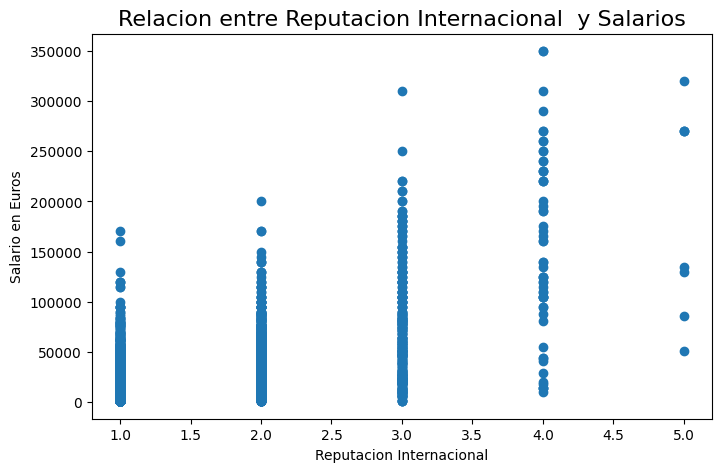

In [ ]:
#Relacion entre Reputacion internacional y Salarios
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df1, x= 'international_reputation', y='wage_eur')
plt.xlabel("Reputacion Internacional")
plt.ylabel("Salario en Euros")
plt.title("Relacion entre Reputacion Internacional  y Salarios", fontsize = 16)
plt.show()



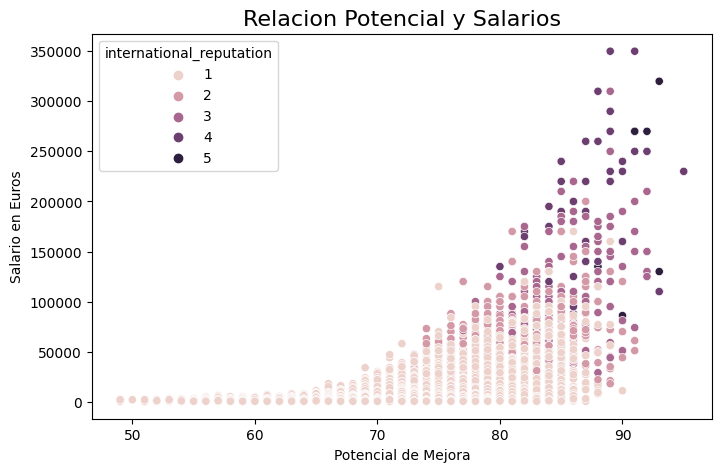

In [ ]:
#Relacion entre Potencial y Salarios entre Reputacion Internacional
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'], hue = df['international_reputation'])
plt.xlabel("Potencial de Mejora")
plt.ylabel("Salario en Euros")
plt.title("Relacion Potencial y Salarios", fontsize = 16)
plt.show()

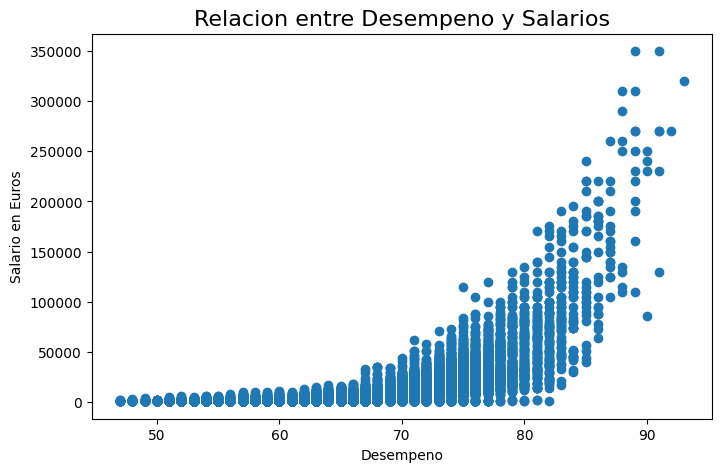

In [ ]:
#Relacion entre Desempeno Actual y Salario

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df, x= 'overall', y='wage_eur')
plt.xlabel("Desempeno")
plt.ylabel("Salario en Euros")
plt.title("Relacion entre Desempeno y Salarios", fontsize = 16)
plt.show()

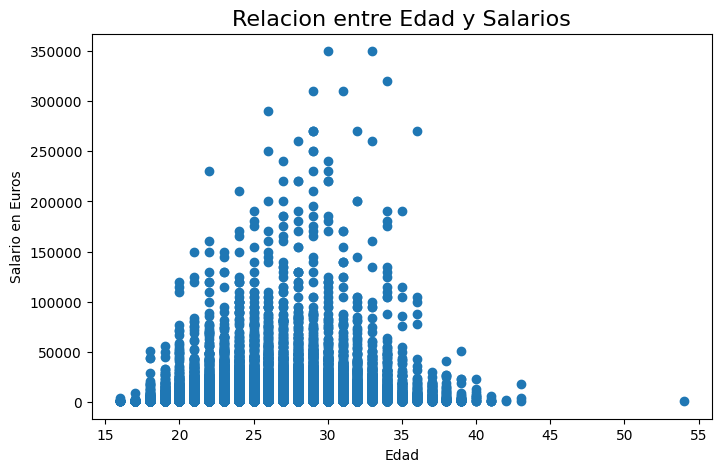

In [ ]:
#Relacion entre Edad y Salarios

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df, x= 'age', y='wage_eur')
plt.xlabel("Edad")
plt.ylabel("Salario en Euros")
plt.title("Relacion entre Edad y Salarios", fontsize = 16)
plt.show()

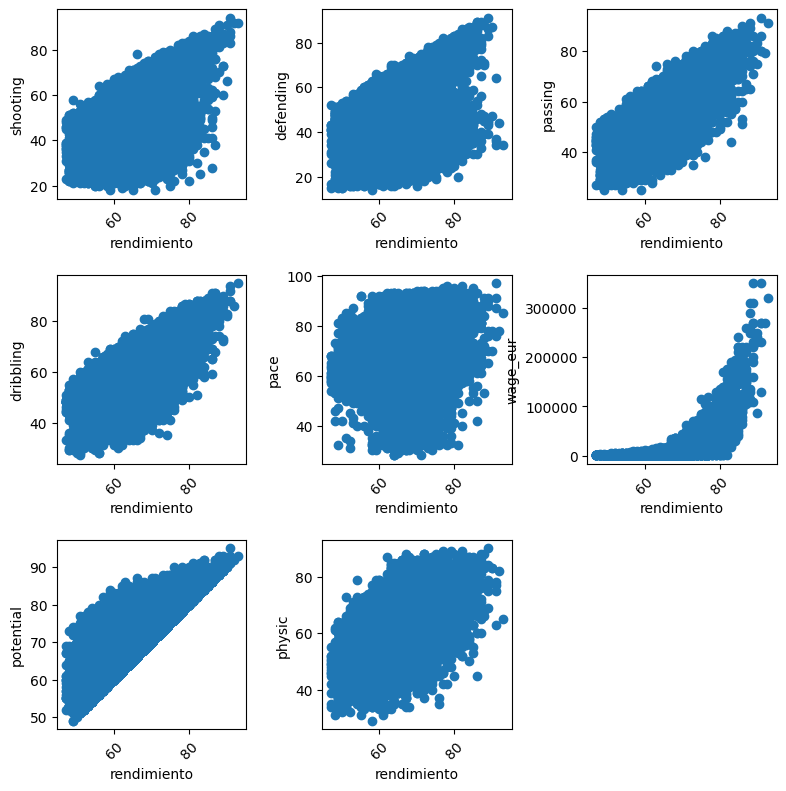

In [ ]:
#Se crea un dataset aparte para evaluar las estadisticas de habilidades y salarios sobre el rendimiento
df_x = df[['shooting','defending','passing','dribbling','pace','wage_eur','potential','physic']]

plt.figure(figsize=(9, 9))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

width = 3
height = 3
index = 1

#Se crea una distribucion en base a cada una de las habilidades
for i in df_x.columns:
    plt.subplot(height, width, index)
    plt.scatter(x=df['overall'],y=df_x[i])
    plt.xlabel('rendimiento')
    plt.ylabel(i)
    plt.xticks(rotation=45)
    index = index + 1

##Analisis sobre los Mejores Jugadores

In [ ]:
#Rendimiento general por jugadores
#Top 50
Mejores_Jugadores = df1.sort_values(by='overall',ascending=False)[["short_name","overall","age","player_positions","wage_eur","league_name", "club_name",]].head(50)
Mejores_Jugadores


,short_name,overall,age,player_positions,wage_eur,league_name,club_name
0,L. Messi,93,34,"RW, ST, CF",320000.0,French Ligue 1,Paris Saint-Germain
1,R. Lewandowski,92,32,ST,270000.0,German 1. Bundesliga,FC Bayern München
2,Cristiano Ronaldo,91,36,"ST, LW",270000.0,English Premier League,Manchester United
3,Neymar Jr,91,29,"LW, CAM",270000.0,French Ligue 1,Paris Saint-Germain
4,K. De Bruyne,91,30,"CM, CAM",350000.0,English Premier League,Manchester City
5,J. Oblak,91,28,GK,130000.0,Spain Primera Division,Atlético de Madrid
6,K. Mbappé,91,22,"ST, LW",230000.0,French Ligue 1,Paris Saint-Germain
7,M. Neuer,90,35,GK,86000.0,German 1. Bundesliga,FC Bayern München
8,M. ter Stegen,90,29,GK,250000.0,Spain Primera Division,FC Barcelona
9,H. Kane,90,27,ST,240000.0,English Premier League,Tottenham Hotspur


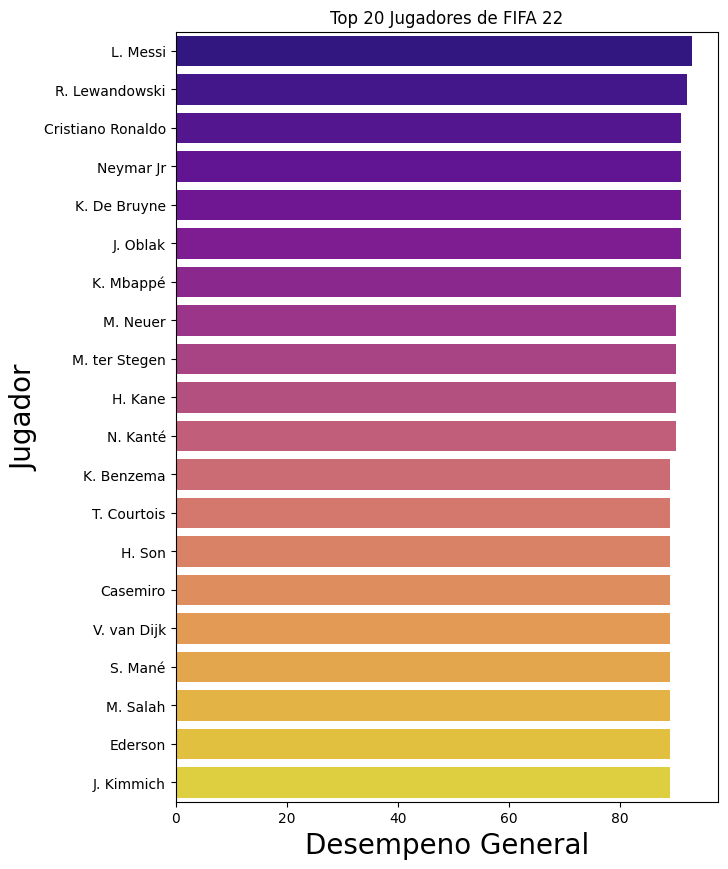

In [ ]:
#Visualizacion de los mejores jugadores

#Obtenemos el rendimiento y los nombres de los jugadores
Overall = df["overall"]
Nombre = df["short_name"]

#Se crea un dataframe con el nombre y el desempeno
data = pd.DataFrame({'short_name': Nombre,'overall':Overall})

x = df['short_name'].head(20)
y = df['overall'].head(20)

#Visualizacion
plt.figure(figsize=(7,10))

ax= sns.barplot(x=y, y=x, palette = 'plasma', orient='h')
plt.xticks()
plt.xlabel('Desempeno General', size = 20)
plt.ylabel('Jugador', size = 20 )
plt.title('Top 20 Jugadores de FIFA 22')

plt.show()

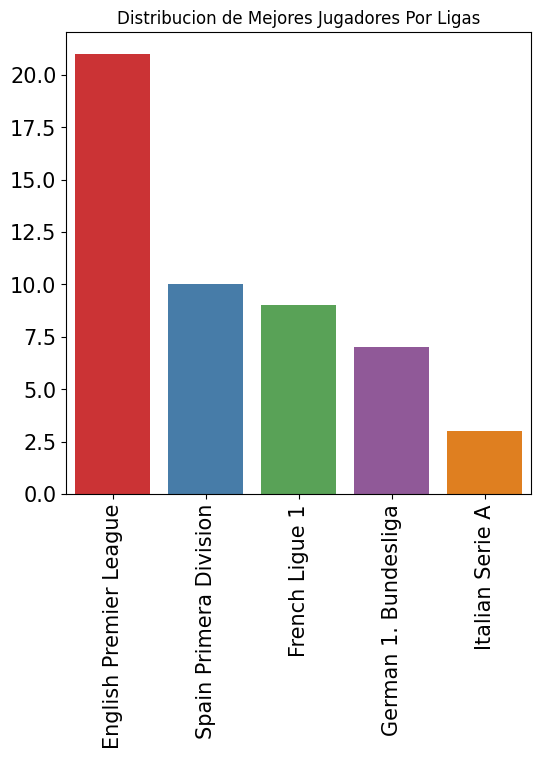

In [ ]:
#Distribucion de mejores jugadores por ligas de futbol
plt.figure(figsize=(6, 6))
sns.barplot(x=Mejores_Jugadores.league_name.value_counts().index, y=Mejores_Jugadores.league_name.value_counts().values,palette="Set1",capsize=.2)

#Visualizacion
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title("Distribucion de Mejores Jugadores Por Ligas")
plt.show()

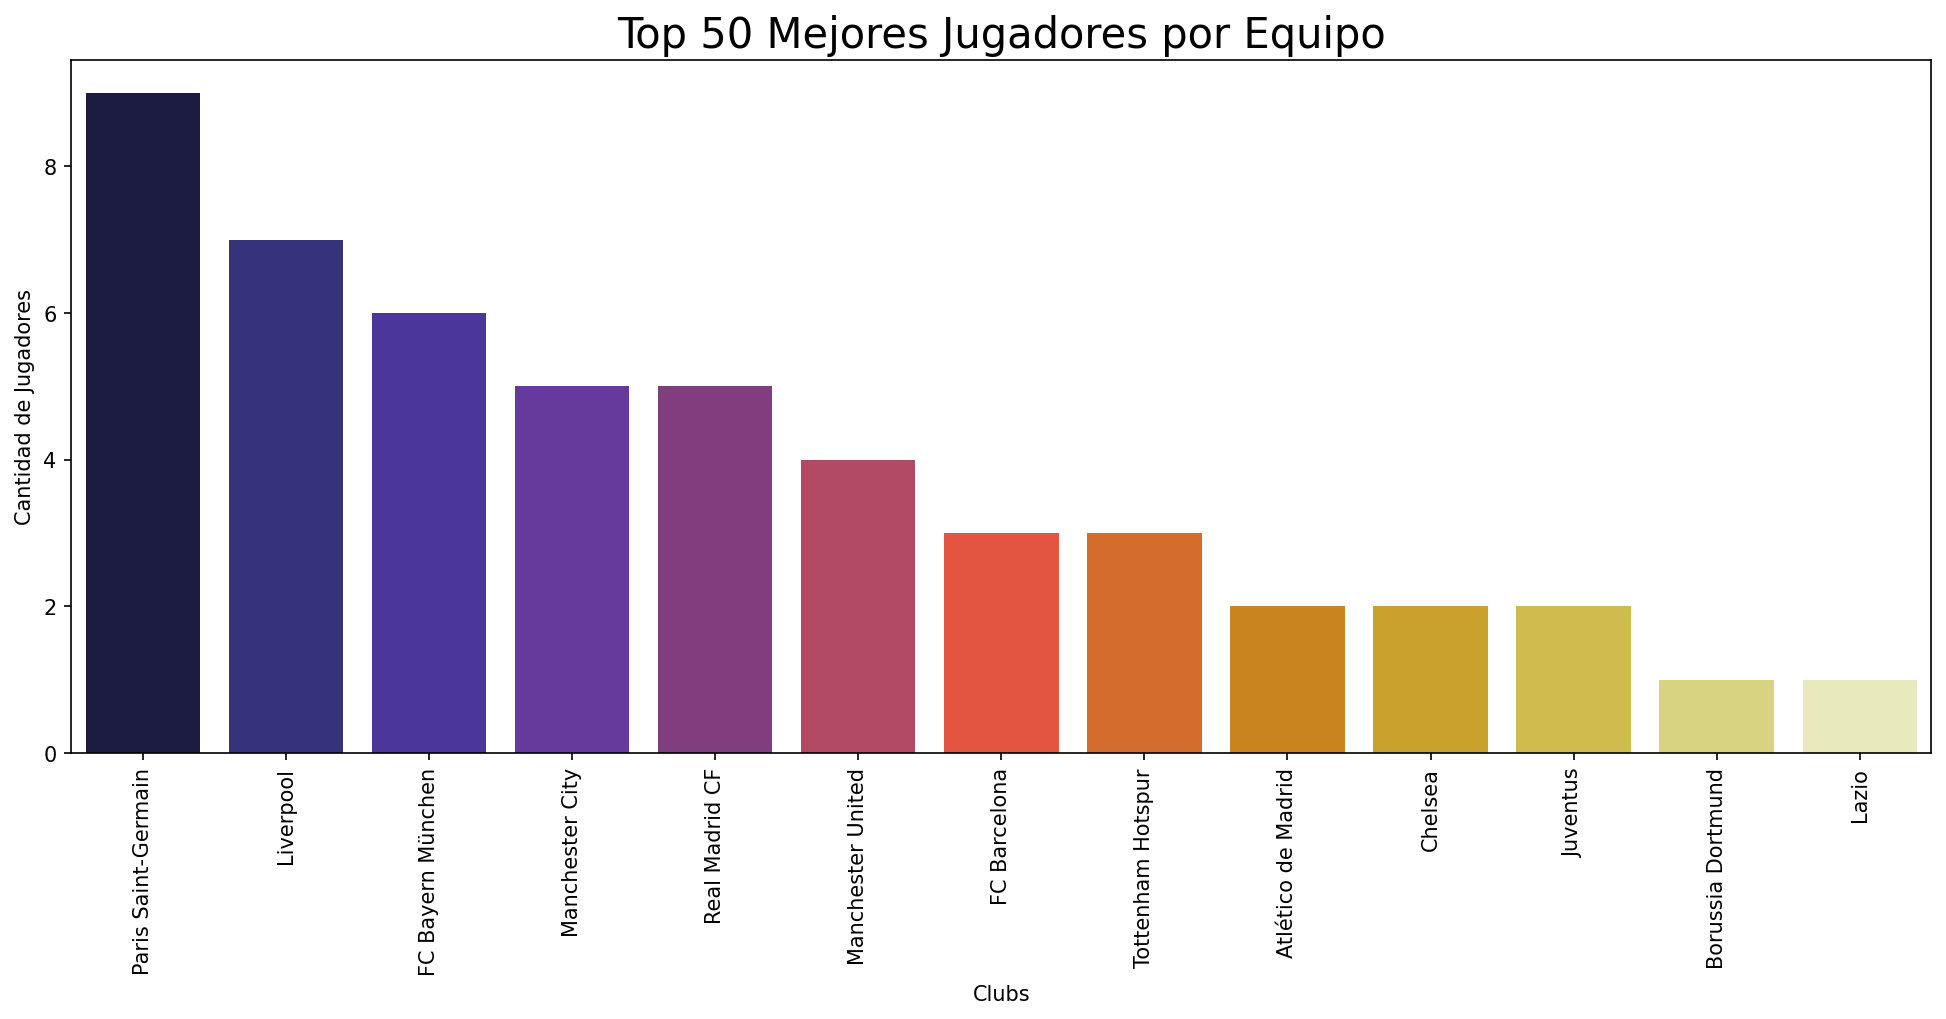

In [ ]:
#Clubes con mayor cantidad de jugadores del top 50
plt.figure(figsize=(16,6),dpi=150)
sns.countplot(x='club_name', data=Mejores_Jugadores.head(50), palette='CMRmap', order=Mejores_Jugadores['club_name'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Clubs')
plt.ylabel('Cantidad de Jugadores')
plt.title('Top 50 Mejores Jugadores por Equipo', fontsize=20)
plt.show()

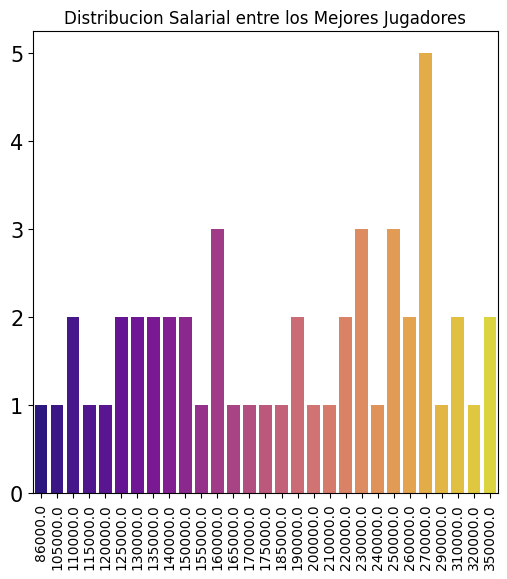

In [ ]:
#Distribucion Salarial entre los Mejores Jugadores
plt.figure(figsize=(6, 6))
sns.barplot(x=Mejores_Jugadores.wage_eur.value_counts().index, y=Mejores_Jugadores.wage_eur.value_counts().values,palette="plasma",capsize=.2)


plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=15)
plt.title("Distribucion Salarial entre los Mejores Jugadores")
plt.show()

##Analisis de Potencial de Jugadores

In [ ]:
#Mayores promesas del futuro
#Vamos a filtrar aquellos jugadores que sean de menores de 25
futuras_estrellas = df1[df1['age'] < 25]

clasificacion = futuras_estrellas.sort_values(by='potential', ascending=False)

potencial = clasificacion[['short_name', 'potential', 'overall', 'age',"player_positions",]].head(20)

potencial

,short_name,potential,overall,age,player_positions
6,K. Mbappé,95,91,22,"ST, LW"
29,E. Haaland,93,88,20,ST
21,G. Donnarumma,93,89,22,GK
43,F. de Jong,92,87,24,"CM, CDM, CB"
44,T. Alexander-Arnold,92,87,22,RB
139,P. Foden,92,84,21,"CAM, LW, CM"
138,K. Havertz,92,84,22,"CAM, CF, CM"
45,J. Sancho,91,87,21,"RM, CF, LM"
46,Rúben Dias,91,87,24,CB
387,Pedri,91,81,18,CM


In [ ]:
#Jugador con mayor proyeccion de crecimiento
df["Crecimiento"] = df['potential'] - df['overall']
maxdif = df["Crecimiento"].idxmax()
df.loc[[maxdif]]

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Crecimiento
18936,C. Brady,Christopher Brady,GK,51,77,220000.0,500.0,17,2004-03-03,191,...,18+2,18+2,16+2,16+2,20+2,20+2,20+2,16+2,50+2,26


In [ ]:
#Jugadores con mayor proyeccion, ordenado por mas jovenes

# Filtrar jugadores con potencial mayor o igual a 85 y ordenar por crecimiento y edad (descendente)
Crec_edad = df[df['potential'] >= 85].sort_values(by=['Crecimiento','age'], ascending = False)

# Seleccionar las columnas especificadas
selected_columns = ['short_name', 'age', 'player_positions', 'overall', 'potential', 'Crecimiento','club_name']

# Mostrar los primeros 20 jugadores con las columnas seleccionadas
top_20_selected = Crec_edad.head(20)[selected_columns]
top_20_selected

,short_name,age,player_positions,overall,potential,Crecimiento,club_name
13245,D. Scarlett,17,ST,63,86,23,Tottenham Hotspur
14349,R. Lavia,17,CDM,62,85,23,Manchester City
9771,Kayky,18,RW,66,87,21,Manchester City
12095,L. Delap,18,ST,64,85,21,Manchester City
9726,C. Clark,18,"CAM, CM",66,86,20,New York Red Bulls
8414,L. Stergiou,19,CB,67,86,19,FC St. Gallen 1879
8564,F. Carvalho,18,CAM,67,86,19,Fulham
9800,Gavi,16,CM,66,85,19,FC Barcelona
8507,Talles Magno,19,"LM, CF",67,85,18,New York City FC
8524,M. Juwara,19,ST,67,85,18,Crotone


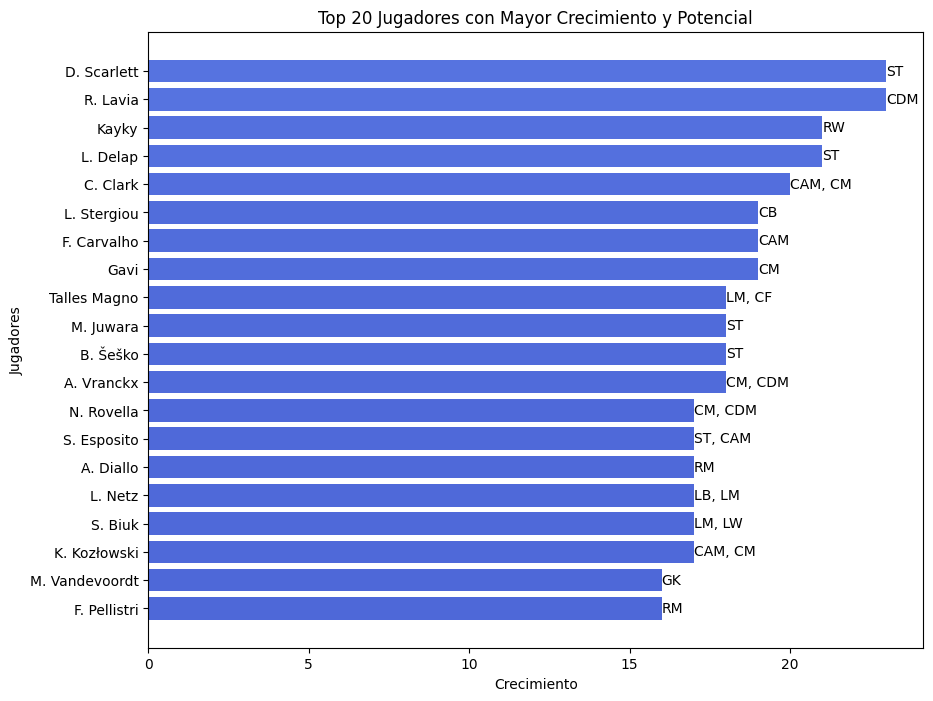

In [ ]:
# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_selected['short_name'], top_20_selected['Crecimiento'], color=plt.cm.coolwarm(top_20_selected['Crecimiento']))
plt.xlabel('Crecimiento')
plt.ylabel('Jugadores')
plt.title('Top 20 Jugadores con Mayor Crecimiento y Potencial')
plt.gca().invert_yaxis()  # Invertir el eje y para que el jugador con mayor crecimiento esté en la parte superior


# Agregar la posición de cada jugador como etiqueta en el gráfico
for bar, position in zip(bars, top_20_selected['player_positions']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, position, va='center', color='black', fontsize=10)

plt.show()

##Modelo Predictivo de Regresion Lineal

*   Elemento de la lista
*   Elemento de la lista



###Regresion Lineal en base al Potencial de los jugadores

In [ ]:
# Cargar el conjunto de datos para la regresion lineal
df_22 = pd.read_csv("players_22.csv")
df_21 = pd.read_csv("players_21.csv")

# Concatenar los conjuntos de datos verticalmente
df_22_21 = pd.concat([df_22, df_21], ignore_index=True)

# Eliminar las columnas que contienen 'url'
columns_to_drop = [col for col in df_22_21.columns if 'url' in col]
df_22_21 = df_22_21.drop(columns=columns_to_drop)

# Mostrar el DataFrame resultante
df_22_21

<ipython-input-87-d23df03d4cef>:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_22 = pd.read_csv("players_22.csv")


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38178,257710,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,1999-04-26,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,15+2
38179,257933,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,1999-01-07,...,48+2,48+2,48+2,47+2,47+2,46+2,46+2,46+2,47+2,15+2
38180,257936,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,1991-11-20,...,47,47,47,47,47,46+1,46+1,46+1,47,11+2
38181,258736,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,2003-03-30,...,32+2,32+2,32+2,35+2,33+2,26+2,26+2,26+2,33+2,14+2


In [ ]:
#Se crea la columna Crecimiento la cual es la resta del potencial y el desempeno
df_22_21['Crecimiento'] = df_22_21['potential'] - df_22_21['overall']

# Filtrar jugadores con potential mayor o igual a 85
filtered_df = df_22_21[df_22_21['potential'] >= 85]

# Seleccionar las características (X) y el objetivo (y)
selected_columns = ['overall', 'age', 'wage_eur', 'Crecimiento']
X = filtered_df[selected_columns]
y = filtered_df['potential']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
reg_model = LinearRegression()

# Entrenar el modelo
reg_model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = reg_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1.92396778613903e-28
R2 Score: 1.0


In [ ]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = X.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación de Pearson:")
print(correlation_matrix)

Matriz de correlación de Pearson:
              overall       age  wage_eur  Crecimiento
overall      1.000000  0.799359  0.768898    -0.947329
age          0.799359  1.000000  0.680714    -0.862419
wage_eur     0.768898  0.680714  1.000000    -0.695117
Crecimiento -0.947329 -0.862419 -0.695117     1.000000


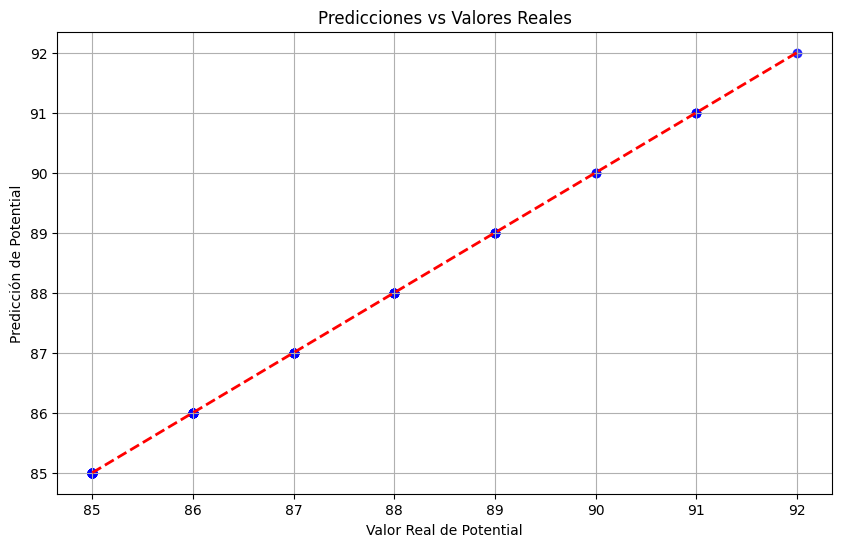

In [ ]:
# Graficar las predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valor Real de Potential')
plt.ylabel('Predicción de Potential')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

In [ ]:
# Filtrar jugadores con potencial mayor o igual a 85
filtered_df = df[df['potential'] >= 85]

# Seleccionar las columnas especificadas
selected_columns = ['overall', 'age', 'wage_eur', 'Crecimiento']

# Seleccionar las características (X)
X = filtered_df[selected_columns]

# Obtener las predicciones de crecimiento del modelo
predicted_growth = reg_model.predict(X)

# Agregar las predicciones de crecimiento al DataFrame filtrado
filtered_df['predicted_growth'] = predicted_growth

# Ordenar los jugadores por las mejores predicciones de crecimiento
top_predicted_growth = filtered_df.sort_values(by='predicted_growth', ascending=False).head(20)

# Mostrar los jugadores con mejores predicciones de crecimiento
print(top_predicted_growth[['short_name', 'player_positions', 'predicted_growth']])


              short_name player_positions  predicted_growth
6              K. Mbappé           ST, LW              95.0
29            E. Haaland               ST              93.0
21         G. Donnarumma               GK              93.0
0               L. Messi       RW, ST, CF              93.0
5               J. Oblak               GK              93.0
1         R. Lewandowski               ST              92.0
8          M. ter Stegen               GK              92.0
44   T. Alexander-Arnold               RB              92.0
43            F. de Jong      CM, CDM, CB              92.0
138           K. Havertz      CAM, CF, CM              92.0
139             P. Foden      CAM, LW, CM              92.0
45             J. Sancho       RM, CF, LM              91.0
18               Ederson               GK              91.0
198           João Félix           CF, ST              91.0
46            Rúben Dias               CB              91.0
387                Pedri               C

<ipython-input-91-66bbdd4d8e18>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['predicted_growth'] = predicted_growth


In [ ]:
#Jugadores con Mayor Potencial por Posicion

# Filtrar jugadores menores de 23 años y con posiciones específicas
jugadores_filtrados = df[df['age'] <= 23]
posiciones_deseadas = ['ST','CF','LS', 'LR', 'CAM', 'CM', 'CMD', 'RM', 'LM','CB','LB','RB','GK']
jugadores_filtrados = jugadores_filtrados[jugadores_filtrados['player_positions'].isin(posiciones_deseadas)]

# Obtener los jugadores con mayor potencial por posición
jugadores_mayor_potencial = jugadores_filtrados.groupby('player_positions')['potential'].max().reset_index()

# Combinar la información para obtener los jugadores completos
jugadores_mayor_potencial_info = jugadores_mayor_potencial.merge(jugadores_filtrados, on=['player_positions', 'potential'], how='left')

# Ordenar los jugadores por crecimiento de mayor a menor
jugadores_ordenados = jugadores_mayor_potencial_info.sort_values(by='potential', ascending=False)

# Seleccionar las columnas especificadas
selected_columns = ['short_name', 'overall', 'potential', 'age', 'player_positions', 'Crecimiento']

# Mostrar los resultados con las columnas seleccionadas
print(jugadores_ordenados[selected_columns])

             short_name  overall  potential  age player_positions  Crecimiento
17           E. Haaland       88         93   20               ST            5
7         G. Donnarumma       89         93   22               GK            4
12  T. Alexander-Arnold       87         92   22               RB            5
6                 Pedri       81         91   18               CM           10
3            M. de Ligt       85         90   21               CB            5
4          D. Upamecano       82         90   22               CB            8
8          T. Hernández       84         90   23               LB            6
16  Francisco Conceição       70         86   18               RM           16
15         F. Pellistri       70         86   19               RM           16
14                 Tete       76         86   21               RM           10
13         V. Tsygankov       80         86   23               RM            6
0             N. Vlašić       80         86   23    

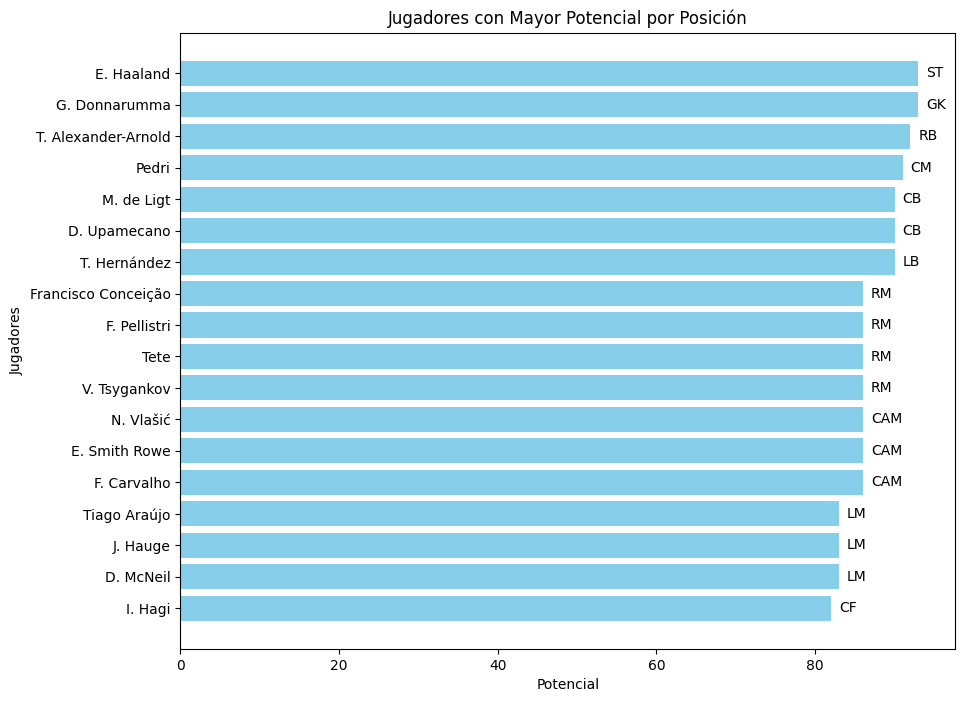

In [ ]:
#Visualizar el potencial de los jugadores
plt.figure(figsize=(10, 8))
plt.barh(jugadores_ordenados['short_name'], jugadores_ordenados['potential'], color='skyblue')
plt.xlabel('Potencial')
plt.ylabel('Jugadores')
plt.title('Jugadores con Mayor Potencial por Posición')
plt.gca().invert_yaxis()  # Invertir el eje y para que el jugador con mayor potencial esté en la parte superior

# Mostrar la posición de los jugadores en el gráfico
for index, value in enumerate(jugadores_ordenados['potential']):
    plt.text(value + 1, index, jugadores_ordenados['player_positions'].iloc[index], va='center')

plt.show()

###Regresion Lineal en base al Crecimiento de los jugadores

In [ ]:
#Se crea la columna Crecimiento la cual es la resta del potencial y el desempeno
df_22_21['Crecimiento'] = df_22_21['potential'] - df_22_21['overall']

#Filtrar jugadores con potencial mayor o igual a 85 y edad menor a 23
filtered_df = df_22_21[(df_22_21['potential'] >= 85) & (df['age'] < 23)]

# Seleccionar las columnas especificadas
selected_columns = ['overall', 'age', 'wage_eur', 'Crecimiento']

# Seleccionar las características (X) y el objetivo (y)
X = filtered_df[selected_columns]
y = filtered_df['potential']

# Obtener las predicciones de potencial del modelo
crecimiento_predicho = reg_model.predict(X)

# Agregar las predicciones de potencial al DataFrame filtrado
filtered_df['Potencial_Predicho'] = crecimiento_predicho

# Ordenar los jugadores por las mejores predicciones de potencial
top_predicted_growth = filtered_df.sort_values(by='Potencial_Predicho', ascending=False).head(20)

# Mostrar los jugadores con mejores predicciones de potencial, ordenados por Crecimiento
top_predicted_growth_sorted = top_predicted_growth.sort_values(by='Crecimiento', ascending=False)
print(top_predicted_growth_sorted[['short_name', 'player_positions', 'Potencial_Predicho', 'Crecimiento']])

               short_name player_positions  Potencial_Predicho  Crecimiento
1459            Ansu Fati               LW                90.0           14
854        R. Gravenberch          CM, CDM                90.0           12
855          M. Greenwood           RM, ST                89.0           11
859          E. Camavinga          CM, CDM                89.0           11
387                 Pedri               CM                91.0           10
499          Vinícius Jr.               LW                90.0           10
661         J. Bellingham           CM, LM                89.0           10
498            A. Bastoni               CB                89.0            9
138            K. Havertz      CAM, CF, CM                92.0            8
139              P. Foden      CAM, LW, CM                92.0            8
198            João Félix           CF, ST                91.0            8
261          D. Upamecano               CB                90.0            8
280         

<ipython-input-94-760e0385ab37>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Potencial_Predicho'] = crecimiento_predicho


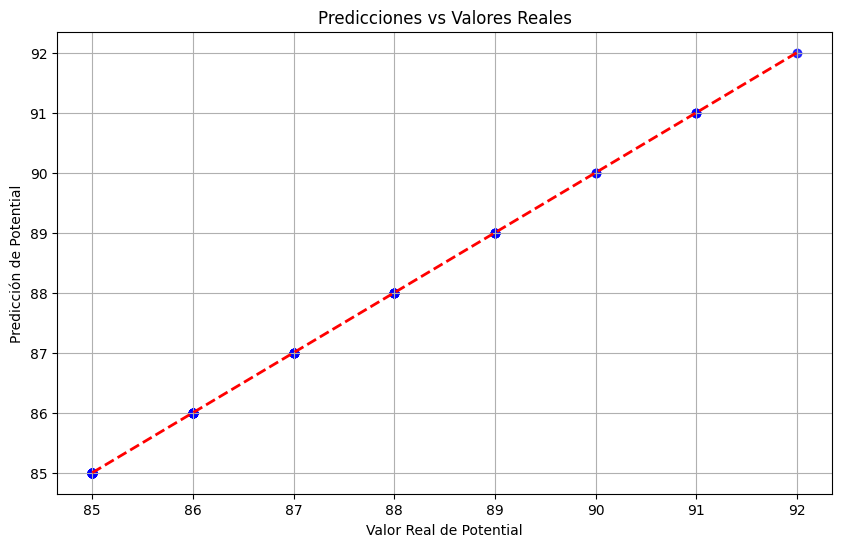

In [ ]:
# Graficar las predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valor Real de Potential')
plt.ylabel('Predicción de Potential')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

In [ ]:
# Filtrar jugadores con potencial mayor o igual a 85 y edad menor a 23
filtered_df = df[(df['potential'] >= 85) & (df['age'] < 23)]

# Seleccionar las columnas especificadas
selected_columns = ['overall', 'age', 'wage_eur', 'Crecimiento']

# Seleccionar las características (X) y el objetivo (y)
X = filtered_df[selected_columns]
y = filtered_df['potential']

# Obtener las predicciones de potencial del modelo
crecimiento_predicho = reg_model.predict(X)

# Agregar las predicciones de potencial al DataFrame filtrado
filtered_df['Potencial_Predicho'] = crecimiento_predicho

# Ordenar los jugadores por las mejores predicciones de potencial
top_predicted_growth = filtered_df.sort_values(by='Potencial_Predicho', ascending=False).head(20)

# Mostrar los jugadores con mejores predicciones de potencial, ordenados por Crecimiento
top_predicted_growth_sorted = top_predicted_growth.sort_values(by='Crecimiento', ascending=False)
print(top_predicted_growth_sorted[['short_name', 'player_positions', 'Potencial_Predicho', 'Crecimiento']])


               short_name player_positions  Potencial_Predicho  Crecimiento
1459            Ansu Fati               LW                90.0           14
854        R. Gravenberch          CM, CDM                90.0           12
855          M. Greenwood           RM, ST                89.0           11
859          E. Camavinga          CM, CDM                89.0           11
387                 Pedri               CM                91.0           10
499          Vinícius Jr.               LW                90.0           10
661         J. Bellingham           CM, LM                89.0           10
498            A. Bastoni               CB                89.0            9
138            K. Havertz      CAM, CF, CM                92.0            8
139              P. Foden      CAM, LW, CM                92.0            8
198            João Félix           CF, ST                91.0            8
261          D. Upamecano               CB                90.0            8
280         

<ipython-input-96-5ebdbcb8ba77>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Potencial_Predicho'] = crecimiento_predicho


####Resultados en base a las predicciones

In [ ]:
#Jugadores con Mayor Crecimiento por Posicion

# Filtrar jugadores menores de 23 años y con posiciones específicas
jugadores_filtrados = df[df['age'] <= 23]
posiciones_deseadas = ['ST','CF','LS', 'LR', 'CAM', 'CM', 'CMD', 'RM', 'LM','CB','LB','RB','GK']
jugadores_filtrados = jugadores_filtrados[jugadores_filtrados['player_positions'].isin(posiciones_deseadas)]

# Obtener los jugadores con mayor crecimiento por posición
jugadores_mayor_potencial = jugadores_filtrados.groupby('player_positions')['Crecimiento'].max().reset_index()

# Combinar la información para obtener los jugadores completos
jugadores_mayor_potencial_info = jugadores_mayor_potencial.merge(jugadores_filtrados, on=['player_positions', 'Crecimiento'], how='left')

# Ordenar los jugadores por crecimiento de mayor a menor
jugadores_ordenados = jugadores_mayor_potencial_info.sort_values(by='Crecimiento', ascending=False)

# Seleccionar las columnas especificadas
selected_columns = ['short_name', 'overall', 'potential', 'age', 'player_positions', 'Crecimiento']

# Mostrar los resultados con las columnas seleccionadas
print(jugadores_ordenados[selected_columns])

         short_name  overall  potential  age player_positions  Crecimiento
7          C. Brady       51         77   17               GK           26
0       K. Urbański       54         79   16              CAM           25
15      A. Hackford       59         84   17               ST           25
1   R. van den Berg       59         83   16               CB           24
2        K. Paulsen       50         74   17               CB           24
4      A. Robertson       58         81   18               CM           23
5            S. Aas       52         75   17               CM           23
6      J. Casas Jr.       50         73   18               CM           23
10    K. Habibullah       56         78   17               LM           22
8        C. Wiggett       59         80   18               LB           21
9          M. Løvik       55         76   17               LB           21
14     Fabio Blanco       62         83   17               RM           21
3          F. Molla      

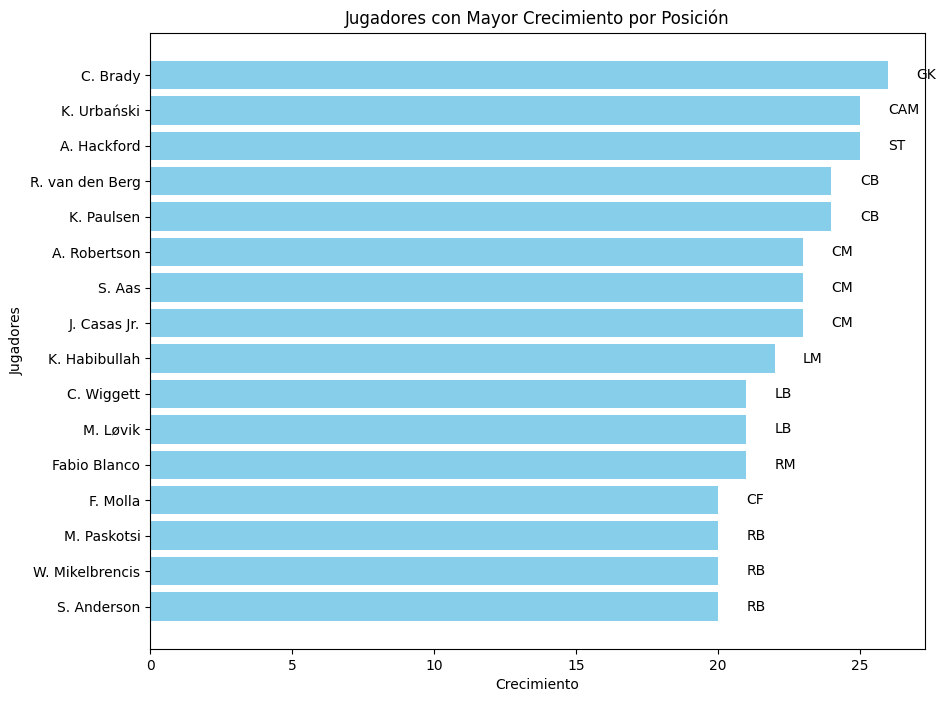

In [ ]:
# Crear un gráfico de barras horizontales con la posición de los jugadores
plt.figure(figsize=(10, 8))
plt.barh(jugadores_ordenados['short_name'], jugadores_ordenados['Crecimiento'], color='skyblue')
plt.xlabel('Crecimiento')
plt.ylabel('Jugadores')
plt.title('Jugadores con Mayor Crecimiento por Posición')
plt.gca().invert_yaxis()  # Invertir el eje y para que el jugador con mayor potencial esté en la parte superior

# Mostrar la posición de los jugadores en el gráfico
for index, value in enumerate(jugadores_ordenados['Crecimiento']):
    plt.text(value + 1, index, jugadores_ordenados['player_positions'].iloc[index], va='center')

plt.show()

###Jugadores con Mayor Potencial

In [ ]:
#Se filtra a los jugadores con condiciones de mejor crecimiento

futuras_estrellas_Total1 = futuras_estrellas[
    (futuras_estrellas.overall >= 58)
    & (futuras_estrellas.overall <= 72)
    & (futuras_estrellas.potential >= 75)
    & (futuras_estrellas.age <= 23)
]

#Se ordena los datos por potencial en orden descendente
futuras_estrellas_Ord1 = futuras_estrellas_Total1.sort_values(by=['potential'], ascending=False)

# Seleccionar las columnas especificadas
selected_columns = ['short_name', 'potential', 'overall', 'age', 'player_positions']

# Mostrar los resultados con las columnas seleccionadas
top_10 = futuras_estrellas_Ord1[selected_columns].head(10)
print(top_10)


                short_name  potential  overall  age player_positions
9771                 Kayky         87       66   18               RW
4479        M. Vandevoordt         87       71   19               GK
5421            N. Rovella         87       70   19          CM, CDM
8564           F. Carvalho         86       67   18              CAM
5406          F. Pellistri         86       70   19               RM
9726              C. Clark         86       66   18          CAM, CM
4516            S. Giménez         86       71   20      ST, CF, CAM
5457   Francisco Conceição         86       70   18               RM
13245          D. Scarlett         86       63   17               ST
3808         Gonçalo Ramos         86       72   20           CF, ST


In [ ]:
#Mejores Delateros del Futuro

# Filtrar las futuras estrellas según las condiciones dadas y posiciones específicas
posicionesDEL = ['ST','CF','LS', 'LR', 'CAM']

futuras_estrellas_TotalDEL = futuras_estrellas[
    (futuras_estrellas.overall >= 58)
    & (futuras_estrellas.overall <= 72)
    & (futuras_estrellas.potential >= 75)
    & (futuras_estrellas.age <= 23)
    & (futuras_estrellas['player_positions'].str.contains('|'.join(posicionesDEL)))
]

# Ordenar las futuras estrellas por potencial en orden descendente
futuras_estrellas_DEL = futuras_estrellas_TotalDEL.sort_values(by=['potential'], ascending=False)

# Seleccionar las columnas especificadas
selected_columns = ['short_name', 'potential', 'overall', 'age', 'player_positions']

# Mostrar los mejores 10 resultados con las columnas seleccionadas
top_10_delanteros = futuras_estrellas_DEL[selected_columns].head(10)
print(top_10_delanteros)

          short_name  potential  overall  age player_positions
7441        B. Šeško         86       68   18               ST
4516      S. Giménez         86       71   20      ST, CF, CAM
3808   Gonçalo Ramos         86       72   20           CF, ST
9726        C. Clark         86       66   18          CAM, CM
13245    D. Scarlett         86       63   17               ST
8564     F. Carvalho         86       67   18              CAM
12095       L. Delap         85       64   18               ST
5394     Fábio Silva         85       70   18               ST
3809    Fábio Vieira         85       72   21          CAM, RM
5392        Y. Demir         85       70   18          CAM, RM


In [ ]:
#Mejores Mediocampos del Futuro

# Filtrar las futuras estrellas según las condiciones dadas y posiciones específicas
posicionesMED = ['CM', 'CMD', 'RM', 'LM']

futuras_estrellas_TotalMED = futuras_estrellas[
    (futuras_estrellas.overall >= 58)
    & (futuras_estrellas.overall <= 72)
    & (futuras_estrellas.potential >= 75)
    & (futuras_estrellas.age <= 23)
    & (futuras_estrellas['player_positions'].str.contains('|'.join(posicionesMED)))
]

# Ordenar las futuras estrellas por potencial en orden descendente
futuras_estrellas_MED = futuras_estrellas_TotalMED.sort_values(by=['potential'], ascending=False)

# Seleccionar las columnas especificadas
selected_columns = ['short_name', 'potential', 'overall', 'age', 'player_positions']

# Mostrar los mejores 10 resultados con las columnas seleccionadas
top_10_medios = futuras_estrellas_MED[selected_columns].head(10)
print(top_10_medios)

               short_name  potential  overall  age player_positions
5421           N. Rovella         87       70   19          CM, CDM
3764           B. Gilmour         86       72   20          CM, CDM
9726             C. Clark         86       66   18          CAM, CM
5406         F. Pellistri         86       70   19               RM
5457  Francisco Conceição         86       70   18               RM
7335         K. Kozłowski         85       68   17          CAM, CM
9800                 Gavi         85       66   16               CM
7407              L. Netz         85       68   18           LB, LM
3809         Fábio Vieira         85       72   21          CAM, RM
7368            A. Diallo         85       68   18               RM


In [ ]:
#Mejores Defensas del Futuro

# Filtrar las futuras estrellas según las condiciones dadas y posiciones específicas
posicionesDEF = ['CB','LB','RB']

futuras_estrellas_TotalDEF = futuras_estrellas[
    (futuras_estrellas.overall >= 58)
    & (futuras_estrellas.overall <= 72)
    & (futuras_estrellas.potential >= 75)
    & (futuras_estrellas.age <= 23)
    & (futuras_estrellas['player_positions'].str.contains('|'.join(posicionesDEF)))
]

# Ordenar las futuras estrellas por potencial en orden descendente
futuras_estrellas_DEF = futuras_estrellas_TotalDEF.sort_values(by=['potential'], ascending=False)

# Seleccionar las columnas especificadas
selected_columns = ['short_name', 'potential', 'overall', 'age', 'player_positions']

# Mostrar los mejores 10 resultados con las columnas seleccionadas
top_10_defensas = futuras_estrellas_DEF[selected_columns].head(10)
print(top_10_defensas)

            short_name  potential  overall  age player_positions
8414       L. Stergiou         86       67   19               CB
7407           L. Netz         85       68   18           LB, LM
4527  A. Bella Kotchap         85       71   19               CB
3825       M. Vušković         85       72   19               CB
4557        T. Nianzou         85       71   19          CB, CDM
7472     M. van de Ven         84       68   20           CB, LB
4540       C. Richards         84       71   21           CB, RB
4563     Tomás Ribeiro         84       71   22               CB
7399            Morato         84       68   20               CB
9563    J. Branthwaite         84       66   19               CB


In [ ]:
#Mejores Porteros del Futuro

# Filtrar las futuras estrellas según las condiciones dadas y posiciones específicas
posicionesPOR = ['GK']

futuras_estrellas_TotalPOR = futuras_estrellas[
    (futuras_estrellas.overall >= 58)
    & (futuras_estrellas.overall <= 72)
    & (futuras_estrellas.potential >= 75)
    & (futuras_estrellas.age <= 23)
    & (futuras_estrellas['player_positions'].str.contains('|'.join(posicionesPOR)))
]

# Ordenar las futuras estrellas por potencial en orden descendente
futuras_estrellas_POR = futuras_estrellas_TotalPOR.sort_values(by=['potential'], ascending=False)

# Seleccionar las columnas especificadas
selected_columns = ['short_name', 'potential', 'overall', 'age', 'player_positions']

# Mostrar los mejores 10 resultados con las columnas seleccionadas
top_10_porteros = futuras_estrellas_POR[selected_columns].head(10)
print(top_10_porteros)

             short_name  potential  overall  age player_positions
4479     M. Vandevoordt         87       71   19               GK
3794         L. Morales         85       72   21               GK
10941     B. Verbruggen         83       65   18               GK
8483        K. Tzolakis         83       67   18               GK
8605        Joan García         83       67   20               GK
11746         G. Bazunu         83       64   19               GK
7261         D. Alemdar         83       68   18               GK
3721         M. Safonov         82       72   22               GK
14371  Alejandro Iturbe         81       62   17               GK
6215        K. Scherpen         81       69   21               GK
